In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
from cv2 import cv2
import random
from pylab import rcParams
import image
from PIL import Image, ImageDraw
from sklearn.utils import shuffle
from keras import backend as K
import keras
import itertools
from keras.utils.np_utils import to_categorical
#from tensorflow.keras.callbacks import LearningRateSchedule
#from keras.callbacks import ModelCheckpoint
from keras.losses import binary_crossentropy
#from keras.objectives import mean_squared_error,mean_absolute_percentage_error
import keras
#from keras.callbacks import *
import matplotlib.pyplot as plt
from keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import KFold,train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout, Conv2D,Conv2DTranspose, BatchNormalization, Activation,AveragePooling2D,Flatten,GlobalAveragePooling2D, Input, Concatenate, MaxPool2D, Add, UpSampling2D, LeakyReLU,ZeroPadding2D
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau,LearningRateScheduler

In [2]:
train=pd.read_csv("C:/Users/ravin/Documents/train_digit/train.csv")
test=pd.read_csv("C:/Users/ravin/Documents/test_digit/test.csv")

In [3]:
train_y = train["label"]
train_x=train.drop(labels=["label"],axis=1)
train_x=train_x/255.0
test=test/255.0

In [4]:
train_x=train_x.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

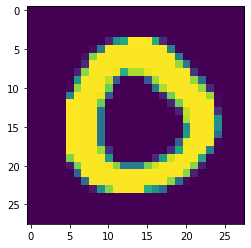

In [5]:
plt.imshow(train_x[4][:,:,0])

In [6]:
train_y=to_categorical(train_y,num_classes=10)
print(train_y[4])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
train_x,val_x,train_y,val_y=train_test_split(train_x,train_y,test_size=0.2,random_state=2)

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [9]:
learning_rate=0.01
lrr=ReduceLROnPlateau(monitor="val_acc",patience=3,verbose=1,factor=0.5,min_lr=0.00001)
batch_size=64

In [10]:
model.compile(optimizer=Adam(lr=learning_rate),loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_x,train_y,batch_size=64,epochs=30,steps_per_epoch=train_x.shape[0]//batch_size,validation_data=(val_x,val_y),verbose=1,shuffle=True)
model.save_weights("digits.h5")

Epoch 1/30
525/525 [==============================] - 105s 200ms/step - loss: 0.2126 - accuracy: 0.9341 - val_loss: 0.1236 - val_accuracy: 0.9637
Epoch 2/30
525/525 [==============================] - 138s 262ms/step - loss: 0.0880 - accuracy: 0.9748 - val_loss: 0.0726 - val_accuracy: 0.9800
Epoch 3/30
525/525 [==============================] - 144s 274ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0501 - val_accuracy: 0.9851
Epoch 4/30
525/525 [==============================] - 139s 265ms/step - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0566 - val_accuracy: 0.9827
Epoch 5/30
525/525 [==============================] - 142s 271ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 6/30
525/525 [==============================] - 138s 264ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0428 - val_accuracy: 0.9881
Epoch 7/30
525/525 [==============================] - 139s 265ms/step - loss: 0.0464 - accuracy: 0.9871 - val_loss: 0.0478 -

In [10]:
model.load_weights("digits.h5")

In [11]:
Y_pred = model.predict(val_x)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(val_y,axis = 1) 

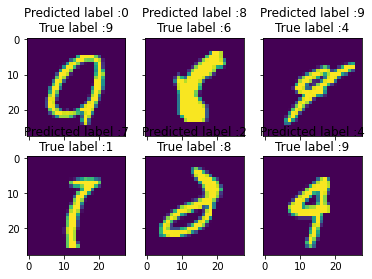

In [12]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = val_x[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [13]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [14]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission_digits.csv",index=False)